# imports

In [14]:
import numpy as np
from scipy.special import expit
import arviz as ar
from scipy.stats import bernoulli, uniform, norm, beta, gamma
from sklearn.metrics import auc

DATA = '/Users/erikjohnson/python/py_packages/Bayesian-Vaccine-Efficacy/data'
HOME = '/Users/erikjohnson/python/py_packages/Bayesian-Vaccine-Efficacy'

# my imports
os.chdir(HOME)
print(f'working dir = {os.getcwd()}')
from utilities.plotUtils import *
from library import *
from utilities.utilityFunctions import pickle_object, unpickle_object

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


working dir = /Users/erikjohnson/python/py_packages/Bayesian-Vaccine-Efficacy


# experiment 1

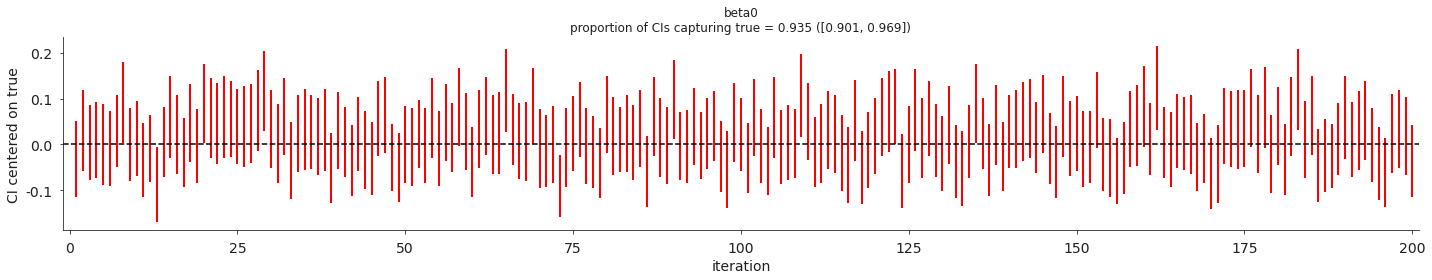

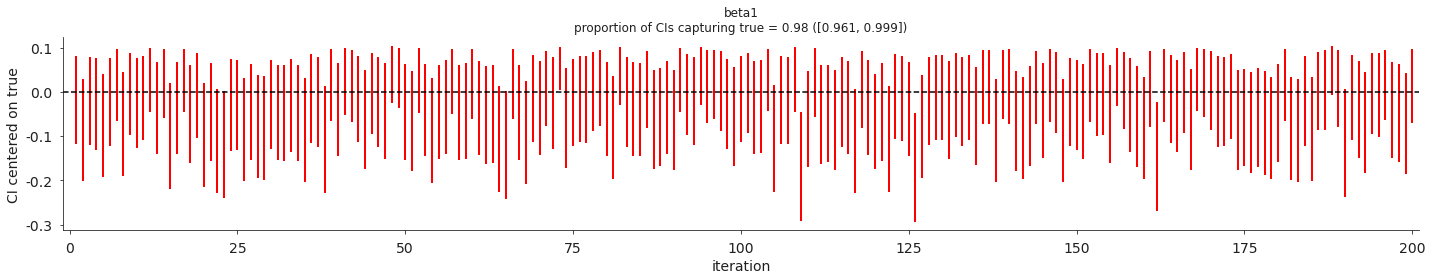

In [16]:
name = 'exp1'
df = unpickle_object(os.path.join(DATA, f'{name}_ci_df.pkl'))
params = ['beta0', 'beta1']

for param in params:
    outpath = os.path.join(HOME, f'figs/{name}_{param}.png')
    create_ci_plots(df, param, outpath)

# experiment 2

In [ ]:
df = unpickle_object(os.path.join(DATA_DIR, 'exp2_ci_df.pkl'))

name = 'exp1'

df = unpickle_object(os.path.join(DATA, f'{name}_ci_df.pkl'))
params = ['beta0', 'beta1']
for param in params:
    outpath = os.path.join(HOME, f'figs/{name}_{param}.png')
    create_ci_plots(df, param, outpath)

# experiment 3

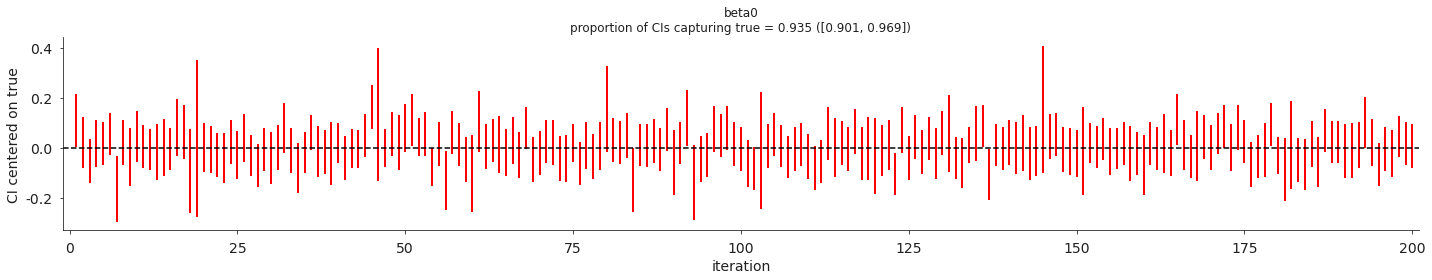

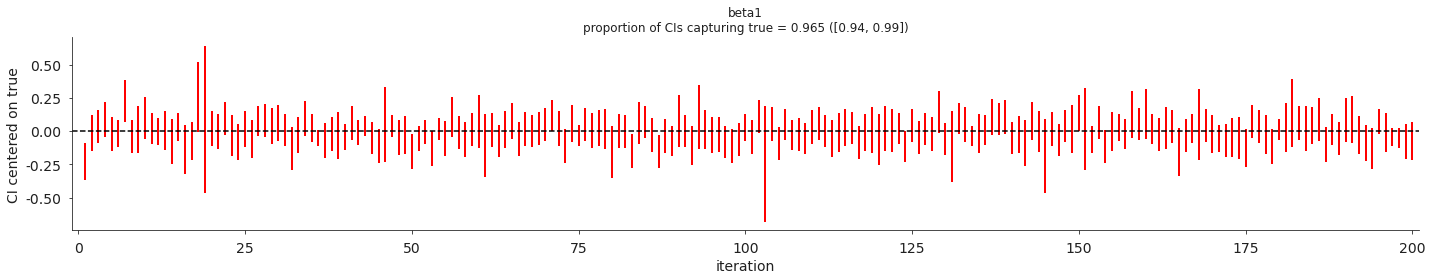

In [17]:
name = 'exp3'
df = unpickle_object(os.path.join(DATA, f'{name}_ci_df.pkl'))
params = ['beta0', 'beta1']

for param in params:
    outpath = os.path.join(HOME, f'figs/{name}_{param}.png')
    create_ci_plots(df, param, outpath)

# experiment 4

In [ ]:
df = unpickle_object(os.path.join(DATA, 'ex4_ci_df.pkl'))


# priors

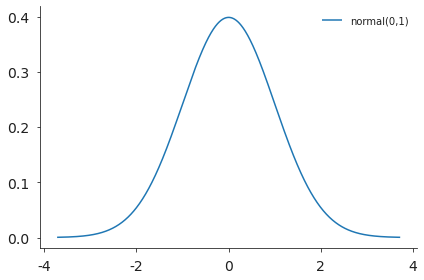

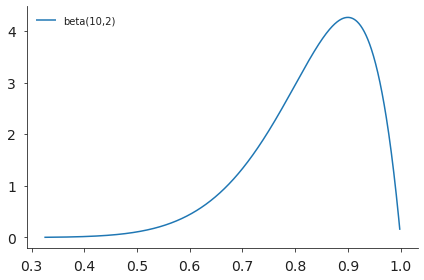

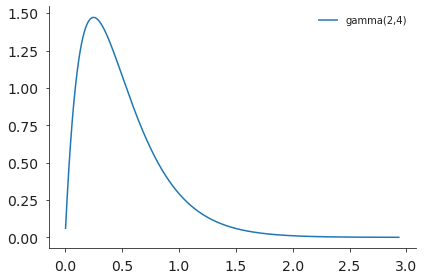

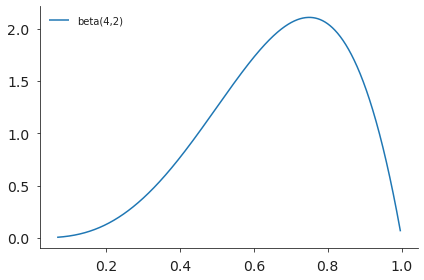

In [10]:

stan = 'normal(0,1)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

stan = 'beta(10,2)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

stan = 'gamma(2,4)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

stan = 'beta(4,2)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

# create 